<a href="https://colab.research.google.com/github/amalvarezme/SenalesSistemas/blob/master/ejSySdiscretizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación discretización de señales

Cuál es la frecuencia de muestreo límite apropiada para discretizar la señal $x(t) = 3 \cos(2000\pi t) + 5 \sin(6000\pi t) + 10 \cos(12000\pi t)$?. Si se utiliza una frecuencia de muestreo de 5kHz, cuál es la señal discreta obtenida?

Frecuencia de Nyquist:
\begin{equation}
F_s \geq 2 F_{\max}
\end{equation}

Cosenos originales $\cos[\omega n],$ $n\in \mathbb{Z}$

\begin{equation}
\omega \in [-\pi,\pi]
\end{equation}

\begin{equation}
\omega = 2 \pi F = \frac{2\pi}{T}\\
F = \frac{\omega}{2 \pi}
\end{equation}



F1 = 1000.0[Hz];F2 = 3000.0[Hz];F3 = 6000.0[Hz]


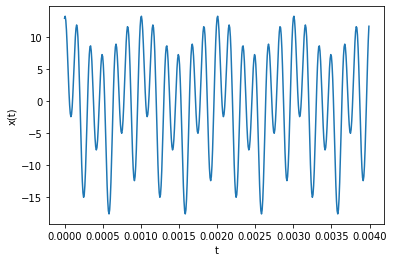

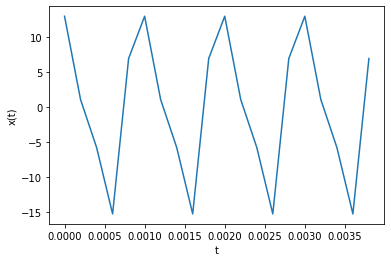

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
w1 = 2000*np.pi
w2 = 6000*np.pi
w3 = 12000*np.pi

f1 = w1/(2*np.pi)
f2 = w2/(2*np.pi)
f3 = w3/(2*np.pi)

print('F1 = %.1f[Hz];F2 = %.1f[Hz];F3 = %.1f[Hz]' % (f1,f2,f3))

#fs >= 2 max(f1,f2,f3) 

fs1 =  5e3#20*f3 # fs = 5k
fs = 20*f3
t1 = 1/f1
t2 = 1/f2
t3 = 1/f3
ts = 1/fs
ts1 = 1/fs1

vt1 = np.arange(0,4*t1,ts1) # p inicial = 0, pfinal = 4T1, step = ts =1/fs
vt2 = np.arange(0,4*t1,ts) # p inicial = 0, pfinal = 4T1, step = ts =1/fs

x = 3*np.cos(w1*vt2) + 5*np.sin(w2*vt2) + 10*np.cos(w3*vt2)
plt.plot(vt2,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

x = 3*np.cos(w1*vt1) + 5*np.sin(w2*vt1) + 10*np.cos(w3*vt1)
plt.plot(vt1,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

\begin{equation}
\frac{\omega_1}{\omega_2} = \frac{2000\pi}{6000\pi} = 1/3 \\
\frac{\omega_1}{\omega_3} = \frac{2000\pi}{12000\pi}= 1/6\\
\frac{\omega_2}{\omega_3} = \frac{6000\pi}{12000\pi}= 1/2\\
\end{equation}

$x(t)$ es cuasiperiódica.

\begin{equation}
k_1 T_1 = k_2 T_2 = k_3 T_3 = T \\ 
{\rm{mcm}}(T_1,T_2,T_3) \\
k_1 \frac{1}{1000} = k_2 \frac{1}{3000} = k_3 \frac{1}{6000}= T \\ 
k_1 \frac{6000}{1000} = k_2 \frac{6000}{3000} = k_3 \frac{6000}{6000} \\ 
k_1 6 = k_2 2 = k_3 1 \\
mcm(6,2,1) = 6\\
k_1 =1; k_2 = 3; k_3=6\\
1 \frac{1}{1000} = 3 \frac{1}{3000} = 6 \frac{1}{6000}= T = \frac{1}{1000} \\ 
\end{equation}


$x(t) = 3 \cos(2000\pi t) + 5 \sin(6000\pi t) + 10 \cos(12000\pi t)$

Discretizar en papel es reemplazar $t = nT_s = n/F_s$; $F_1=1000$, $F_2=3000$; $F_3=6000$

$x[t=n T_s] = 3 \cos[2\pi F_1 nT_s] + 5 \sin[2\pi F_2 nT_s] + 10 \cos[2\pi F_3 n T_s]$

$x[t=n T_s] = 3 \cos[2\pi  \tfrac{F_1}{F_s} n] + 5 \sin[2\pi \tfrac{F_2}{F_s}n] + 10 \cos[2\pi \tfrac{F_3}{F_s}n ]$

$\Omega_i = 2\pi f_i = 2\pi \tfrac{F_i}{F_s}$

$\Omega \in [-\pi,\pi]$

$\Omega_1 = 2 \pi \tfrac{1000}{5000} = \frac{2}{5}\pi \in [-\pi,\pi]$ (Original)

$\Omega_2 = 2 \pi \tfrac{3000}{5000} = \frac{6}{5}\pi > \pi$ (Copia Alias)

$\Omega_3 = 2 \pi \tfrac{6000}{5000} = \frac{12}{5}\pi > \pi$ (Copia Alias)

$\Omega_i = 2 \pi \tfrac{F_i}{20 F_i} =\pi$ (Caso crítico)


Respuesta: x(t) debe ser muestreada con un sistema que incorpere $F_s \geq 2F_3$, es decir $F_s \geq 2 x 6000$; $F_s \geq 12000 [Hz]$.

Si $F_s = 5000 [Hz]$: 

$x[n] = 3 \cos[\tfrac{2}{5}\pi n] + 5 \sin[\tfrac{6}{5}\pi n] + 10 \cos[\tfrac{12}{5}\pi n ]$

Si  $\Omega_i$ copia (después de simplificar fraccionarios a su mínima expresión), debemos encontrar el original de dicha copia, para ello restamos $2\pi$
$\Omega^{original}_i= \Omega^{copia}_i - 2\pi$
$\Omega^{original}_2 =\Omega^{copia}_2 -  2 \pi = \frac{6}{5}\pi - 2\pi = (6\pi -10\pi)/5 = \frac{-4\pi}{5} $
$\Omega^{original}_3 =\Omega^{copia}_3 -  2 \pi = \frac{12}{5}\pi - 2\pi = (12\pi -10\pi)/5 = \frac{2\pi}{5} $

Después de encontrar cosenos y senos originales:

$x[n] = 3 \cos[\tfrac{2}{5}\pi n] + 5 \sin[\tfrac{-4}{5}\pi n] + 10 \cos[\tfrac{2}{5}\pi n ]$

$x[n] = 13 \cos[\tfrac{2}{5}\pi n] + 5 \sin[\tfrac{-4}{5}\pi n] $


$F_1 = 1000 Hz$
$F_3 = 6000 = F_1 + F_s = 1000 + 5000 = 6000 [Hz]$

